# Cheating on your math homework with SymPy

![Sympy Logo](http://localhost:8888/files/images/sympy-small.svg)

http://www.sympy.org



Let's start with a basic question

What is (x+2)<sup>2</sup>?

A programmer might answer: Well I can build a function that takes in a value for x and spits out the value

In [2]:
# The programmer's answer
def expr(x):
    return (x+2)**2

expr(5)

49

A mathematician might say: "Well I can do that multiplication to expand that expression" and write out the expression as

(x+2)(x+2)

Before doing the usual first, outside, inside, last multiplications and arriving at

x<sup>2</sup>+4x+4

What we see in these two examples is the difference between the kind of math we typically have in our programs and the ability to perform operations on symbols.

Computer Algebra System (CAS)

A system which allows a computer to perform mathematical operations on symbols.

Other examples of CAS software include:

* Maple https://www.maplesoft.com
* Mathematica http://www.wolfram.com/mathematica 

In [3]:
# Allows output to contain characters such as greek letters, etc.  More on this later
from sympy import init_printing
init_printing()

In [4]:
from sympy import symbols
x = symbols('x')
expr = (x+2)**2
expr

In [5]:
# Sympy doesn't automatically expand expressions (leaves it up to the user)
from sympy import expand
expanded = expand(expr)
expanded

In [6]:
# To reverse the process use factor
from sympy import factor
factor(expanded)

In [7]:
# If I wanted to show my work while factoring the following
expr = x**2 -1*x - 6
expr

I'm going to guess that (x-3) is one of the factors

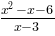

In [8]:
expr / (x-3)

That's not horribly helpful let's try running that through simply

In [10]:
from sympy import simplify
simplify(expr / (x-3))

Let's see what happens if I try something that isn't a factor

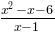

In [12]:
simplify(expr / (x-1))

Let SymPy do the work

In [13]:
factor(expr)

You can build expressions from strings with sym-pify.

In [17]:
from sympy import sympify
sympify('x**2 + sin(y)')

# Warning sym-pify uses eval.  Don't use with un-sanitized inputs!

I'm not sure how helpful sym-pify is.  If you're using it to process input from a webpage you have to deal with sanitizing issues.  It doesn't really help you as a developer since code using SymPy is fairly terse.  Perhaps if you want to store the results of a calculation in a database.

## Basic Operations

Create a new expression to clean up a bit.

In [53]:
# Notice how multiple symbols are defined in 1 call to symbols
x, y = symbols('x y')
expr = x**2 + x
expr

substitute y+2 in place of X

In [54]:
expr.subs(x, y+2)

In [55]:
expr.subs(x, 1)

So what about an actual Equation?  Well we can do that with Eq.

In [56]:
from sympy import Eq
x, y = symbols('x y')
eqn = Eq(5, 2*x + 1)

In [57]:
eqn

You can access either side of the equation via the lhs and rhs attributes

In [58]:
lhs = eqn.lhs
lhs

In [59]:
rhs = eqn.rhs
rhs

Please note that rhs and lhs are read-only

In [60]:
try:
    eqn.lhs = eqn.lhs - 1
except AttributeError as ae:
    print(ae)

can't set attribute


In [61]:
from sympy import solveset
solveset(eqn, x)

sympy can also be used to solve a system of equations for instance

Solve the following equations for x and y: x + y = 6 and -3x + y = 2

1. &nbsp;&nbsp;x = 6 - y
2. &nbsp;&nbsp;-3(6 - y) + y = 2
3. &nbsp;&nbsp;-18 + 3y + y = 2
4. &nbsp;&nbsp;4y = 20
5. &nbsp;&nbsp;y = 5
6. &nbsp;&nbsp;x = 6 - 5 = 1

In [62]:
from sympy import linsolve
eqn1 = Eq(x + y , 6)
eqn2 = Eq(-3*x + y, 2)
linsolve([eqn1, eqn2], (x, y)) 

You can use greek letters for symbols.  Capitalize the first character of the name for the capital letter.

In [66]:
symbols('alpha Alpha beta Beta gamma Gamma')

You're not just limited to single character symbols.  Note how the underscore creates a subscripted symbol.

In [68]:
symbols('name quest favorite_color airspeed')

## "I also dabble in  precision" 

*-Rick Sanchez*

Since we're operating symbolically we can manipulate expressions without rounding due to floating point.  There's a few things to note about the expression:

* How the square root of 8 is displayed
* How to create a rational number
* How the terms in the expression aren't in the same order as they are defined

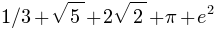

In [73]:
from sympy import sqrt, exp, pi, Rational
expr = sqrt(8) + sqrt(5) + exp(2) + pi + Rational(1, 3)
expr

evalf will give you the floating point value of the expression, rounded to 15 decimal places

In [74]:
expr.evalf()

Pass a value to specify how many decimal places you want.

In [77]:
expr.evalf(50)

## Printing

init_printing will enable the best printer available in the environment.
- iPython/Jupyter Notebook Uses Latex rendered by MathJax by default.
- From the command line unicode characters will be used if supported

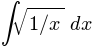

In [78]:
from sympy import latex, Integral
expr = Integral(sqrt(1/x), x)
expr

In [79]:
# Latex is a typesetting language that has been used for math formulas for decades.
print(latex(expr))

\int \sqrt{\frac{1}{x}}\, dx


In [80]:
# str() just spits out the expression as it's coded
x = symbols('x')
str(expr)



'Integral(sqrt(1/x), x)'

srepr provides a string describing how the expression is modeled in sympy

In [81]:
# If you're stuck in a plain text world
from sympy import pprint
pprint(Integral(sqrt(1/x), x), use_unicode=False) # the ASCII form

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            


In [82]:
pprint(Integral(sqrt(1/x), x)) # the Unicode form

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


Sympy can also output expressions as MathML which is a W3C XML grammer for mathematics.  There's 2 flavors of MathML markup:

1. Presentation markup: Describes how expressions should appear.  This is how you can embed mathematical expressions in a webpage
2. Content markup: Describes the structure of the expression

Unfortunately SymPy just outputs content markup.

In [29]:
from sympy.printing.mathml import print_mathml
print_mathml(Integral(sqrt(1/x), x))

<apply>
	<int/>
	<bvar>
		<ci>x</ci>
	</bvar>
	<apply>
		<root/>
		<apply>
			<power/>
			<ci>x</ci>
			<cn>-1</cn>
		</apply>
	</apply>
</apply>



## Simplification

simplify can handle trignonometric expressions, etc. 

In [83]:
from sympy import sin, cos 
simplify(sin(x)**2 + cos(x)**2)

Consider an expression with terms like x and x squared scattered around

In [84]:
x, y, z = symbols('x y z')
expr = x*y + x - 3 + 2*x**2 + 2*x**3- z*x**2 + x**3
expr

collect will group similar terms together

In [85]:
from sympy import collect
collect(expr, x)

Cancel will remove terms witch cancel each other out.

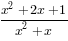

In [88]:
expr = (x**2 + 2*x + 1)/(x**2 + x)
expr

Keep in mind this expression is:

(x + 1)(x + 1) / x(x + 1)

In [89]:
from sympy import cancel
cancel(expr)

## Matrices

Creating a matrix is simple.  Import Matrix and pass it a list of lists (for a 2D array)

In [95]:
from sympy import Matrix 
M = Matrix([[1, 2, 3], [4, 5, 6]])
M

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

Use the shape attribute to get the shape of the matrix.  In the standard rows x columns terminology

In [96]:
M.shape

N x 1 column matrices can be created by passing a single list of values.

In [98]:
N = Matrix([1, 2, 3])
N

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣3⎦

Multiplying by a scalar is easy.

In [ ]:
N * 2

## Caveats

In [42]:
# the name of the symbol has nothing to do with the variable it's assigned
# to so don't cross your wires like this
a, b = symbols('b a')
print('a is', a)
print('b is', b)

a is b
b is a


### SymPy is NOT Numpy!

Keep your 1000 x 1000 matrices to yourself!

## Scratch

In [43]:
expr = (x+2) * (x-3)
expand(expr)

In [44]:
factor(expr)

In [45]:
# Tsiolkovsky rocket equation
from sympy import ln
delta_v, v_exhaust, mass_total, mass_unfueled = symbols('Delta_v v_exhaust mass_total mass_unfueled')
rocket_eqn = Eq(delta_v, v_exhaust * ln(mass_total / mass_unfueled))

rocket_eqn

In [46]:
# Specific Impulse
F_thrust, g_0, I_sp, mass_flow = symbols('F_thrust g_0 I_sp mass_flow')
isp_eqn = Eq(F_thrust, g_0 * I_sp * mass_flow)
isp_eqn

Mainsail Engine from Kerbal Space Program.  Stats when operating in vaccuum.
Thrust: 1500 KN
Isp  310 seconds

In [47]:
solution = solveset(isp_eqn, mass_flow)
solution

In [49]:
mass_flow_eqn = Eq(mass_flow, list(solution)[0])
mass_flow_eqn

In [126]:
mass_flow_eqn.subs([(F_thrust, 1500), (g_0, 9.8), (I)])